In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/home/resisistancerow_909/image-to-tex-OCR/Jupyter_Notebooks
Current path:/home/resisistancerow_909/image-to-tex-OCR


In [2]:
# Import the Printed_Tex_Data_Module

from Data.Data_Module import Data_Module
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display, Math

In [3]:
'''
path_to_formulas = 'Data/Data_Bank/formulas.lst',
                  path_to_image_names= 'Data/Data_Bank/images',


'''


data = Data_Module(stage = 'fit',
                 set_max_label_length = 128,
                 number_png_images_to_use_in_dataset=300*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.99,
                vocabulary_path = 'Data/Data_Bank/230k.json',
                
                load_vocabulary = True,
                   image_padding = True,
                 


                batch_size = 64,
                num_workers = 8,
                data_on_gpu = False,
                )



# Generates the dataframe from the images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt
data.prepare_data()

# if one wants to load a vocabulary do not use data.prepare_dataframe(), 
# but instead set load_vocabulary = True


In [4]:
data.df

,formula,image_name,height,width,formula_length,latex_tokenized,tokenized_len
0,R _ { 1 2 } K _ { 1 } R _ { 2 1 } d K _ { 2 } ...,80f1db54ec657ab.png,20,200,105,"[R, _, {, 1, 2, }, K, _, {, 1, }, R, _, {, 2, ...",53
1,E _ { n } - E _ { m } = \frac { \lambda ^ { \p...,4c0c01a5fb03248.png,39,169,106,"[E, _, {, n, }, -, E, _, {, m, }, =, \frac, {,...",46
2,\sigma ^ { 1 } + i \sigma ^ { 2 } = f ( \sigma...,3f55826fd850d77.png,19,138,75,"[\sigma, ^, {, 1, }, +, i, \sigma, ^, {, 2, },...",28
3,B | _ { \partial \Sigma _ { 3 } } \rightarrow ...,a6a043f87f6ffdc.png,20,142,123,"[B, |, _, {, \partial, \Sigma, _, {, 3, }, }, ...",36
4,\phi _ { i } ^ { \prime } ( x ) = \phi _ { i }...,4d0e536147c711b.png,18,175,118,"[\phi, _, {, i, }, ^, {, \prime, }, (, x, ), =...",43
...,...,...,...,...,...,...,...
238324,"< \tilde { \phi } _ { \omega } , \phi _ { \ome...",f39eae8d337aa45.png,34,415,310,"[<, \tilde, {, \phi, }, _, {, \omega, }, ,, \p...",104
238325,S = { \frac { 1 } { 8 \pi } } \int d x d y \le...,4300c834ccf1441.png,37,354,231,"[S, =, {, \frac, {, 1, }, {, 8, \pi, }, }, \in...",80
238326,A _ { \mu i j } ^ { a } = < \psi _ { j } ^ { a...,e905b0f81c6129c.png,35,128,126,"[A, _, {, \mu, i, j, }, ^, {, a, }, =, <, \psi...",49
238327,"B _ { I } ( f , g ) = B _ { J } ( f , g ) , \q...",86ff16d9846059b.png,17,185,62,"[B, _, {, I, }, (, f, ,, g, ), =, B, _, {, J, ...",26


In [5]:
print( 
    'Vocabulary size:',len(data.vocabulary),
    '\nMax label length:', data.max_label_length,
    "\nStart <S> goes to index ",data.vocabulary['<S>'],
      "\nEnd <E> goes to index ",data.vocabulary['<E>'],
      "\nPadding <P> goes to index ",data.vocabulary['<P>'],
)

Vocabulary size: 579 
Max label length: 130 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [6]:
# prepeares the dataloaders with transformations and splits train/val
data.setup()

Train/Val Data is ready for Model loading.


In [7]:
data.inverse_vocabulary

{0: '<S>',
 1: '<E>',
 2: '<P>',
 3: '!',
 4: '"',
 5: '&',
 6: '(',
 7: ')',
 8: '*',
 9: '+',
 10: ',',
 11: '-',
 12: '--',
 13: '---',
 14: '.',
 15: '/',
 16: '0',
 17: '0.14',
 18: '0.4',
 19: '0.5',
 20: '0.7',
 21: '1',
 22: '1.5',
 23: '10',
 24: '2',
 25: '3',
 26: '4',
 27: '5',
 28: '6',
 29: '7',
 30: '8',
 31: '8.5',
 32: '9',
 33: ':',
 34: ';',
 35: '<',
 36: '=',
 37: '>',
 38: '?',
 39: '@',
 40: 'A',
 41: 'B',
 42: 'C',
 43: 'D',
 44: 'E',
 45: 'F',
 46: 'G',
 47: 'H',
 48: 'I',
 49: 'J',
 50: 'K',
 51: 'L',
 52: 'M',
 53: 'N',
 54: 'O',
 55: 'P',
 56: 'Q',
 57: 'R',
 58: 'S',
 59: 'T',
 60: 'U',
 61: 'V',
 62: 'W',
 63: 'X',
 64: 'Y',
 65: 'Z',
 66: '[',
 67: '\\',
 68: '\\!',
 69: '\\#',
 70: '\\&',
 71: '\\,',
 72: '\\:',
 73: '\\;',
 74: '\\Big',
 75: '\\Bigg',
 76: '\\Biggl',
 77: '\\Biggm',
 78: '\\Biggr',
 79: '\\Bigl',
 80: '\\Bigm',
 81: '\\Bigr',
 82: '\\Box',
 83: '\\Gamma',
 84: '\\Huge',
 85: '\\Im',
 86: '\\Join',
 87: '\\LARGE',
 88: '\\Lambda',
 89: '

# Checking the data 


In [8]:
data.df['image_name'][10]

'0110f3766ade0e1.png'

Image is below


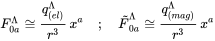

Label:


<IPython.core.display.Math object>

Tex formula: 

F _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( e l ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a } \quad ; \quad { \tilde { F } } _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( m a g ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a }


In [9]:
# How to access generated png images 
IMAGE_NAME = data.df['image_name'][10]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

### Check  vocabulary 

In [10]:
print(data.vocabulary)

{'<S>': 0, '<E>': 1, '<P>': 2, '!': 3, '"': 4, '&': 5, '(': 6, ')': 7, '*': 8, '+': 9, ',': 10, '-': 11, '--': 12, '---': 13, '.': 14, '/': 15, '0': 16, '0.14': 17, '0.4': 18, '0.5': 19, '0.7': 20, '1': 21, '1.5': 22, '10': 23, '2': 24, '3': 25, '4': 26, '5': 27, '6': 28, '7': 29, '8': 30, '8.5': 31, '9': 32, ':': 33, ';': 34, '<': 35, '=': 36, '>': 37, '?': 38, '@': 39, 'A': 40, 'B': 41, 'C': 42, 'D': 43, 'E': 44, 'F': 45, 'G': 46, 'H': 47, 'I': 48, 'J': 49, 'K': 50, 'L': 51, 'M': 52, 'N': 53, 'O': 54, 'P': 55, 'Q': 56, 'R': 57, 'S': 58, 'T': 59, 'U': 60, 'V': 61, 'W': 62, 'X': 63, 'Y': 64, 'Z': 65, '[': 66, '\\': 67, '\\!': 68, '\\#': 69, '\\&': 70, '\\,': 71, '\\:': 72, '\\;': 73, '\\Big': 74, '\\Bigg': 75, '\\Biggl': 76, '\\Biggm': 77, '\\Biggr': 78, '\\Bigl': 79, '\\Bigm': 80, '\\Bigr': 81, '\\Box': 82, '\\Gamma': 83, '\\Huge': 84, '\\Im': 85, '\\Join': 86, '\\LARGE': 87, '\\Lambda': 88, '\\Large': 89, '\\Leftarrow': 90, '\\Leftrightarrow': 91, '\\Longleftarrow': 92, '\\Longleftri

In [11]:
# Can acrtually see the frequncies

data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

,token,id,freq
575,{,575,2578717
577,},577,2578717
543,_,543,852123
542,^,542,720561
24,2,24,432506
...,...,...,...
503,\unlhd,503,1
177,\cl,177,1
1,<E>,1,0
2,<P>,2,0


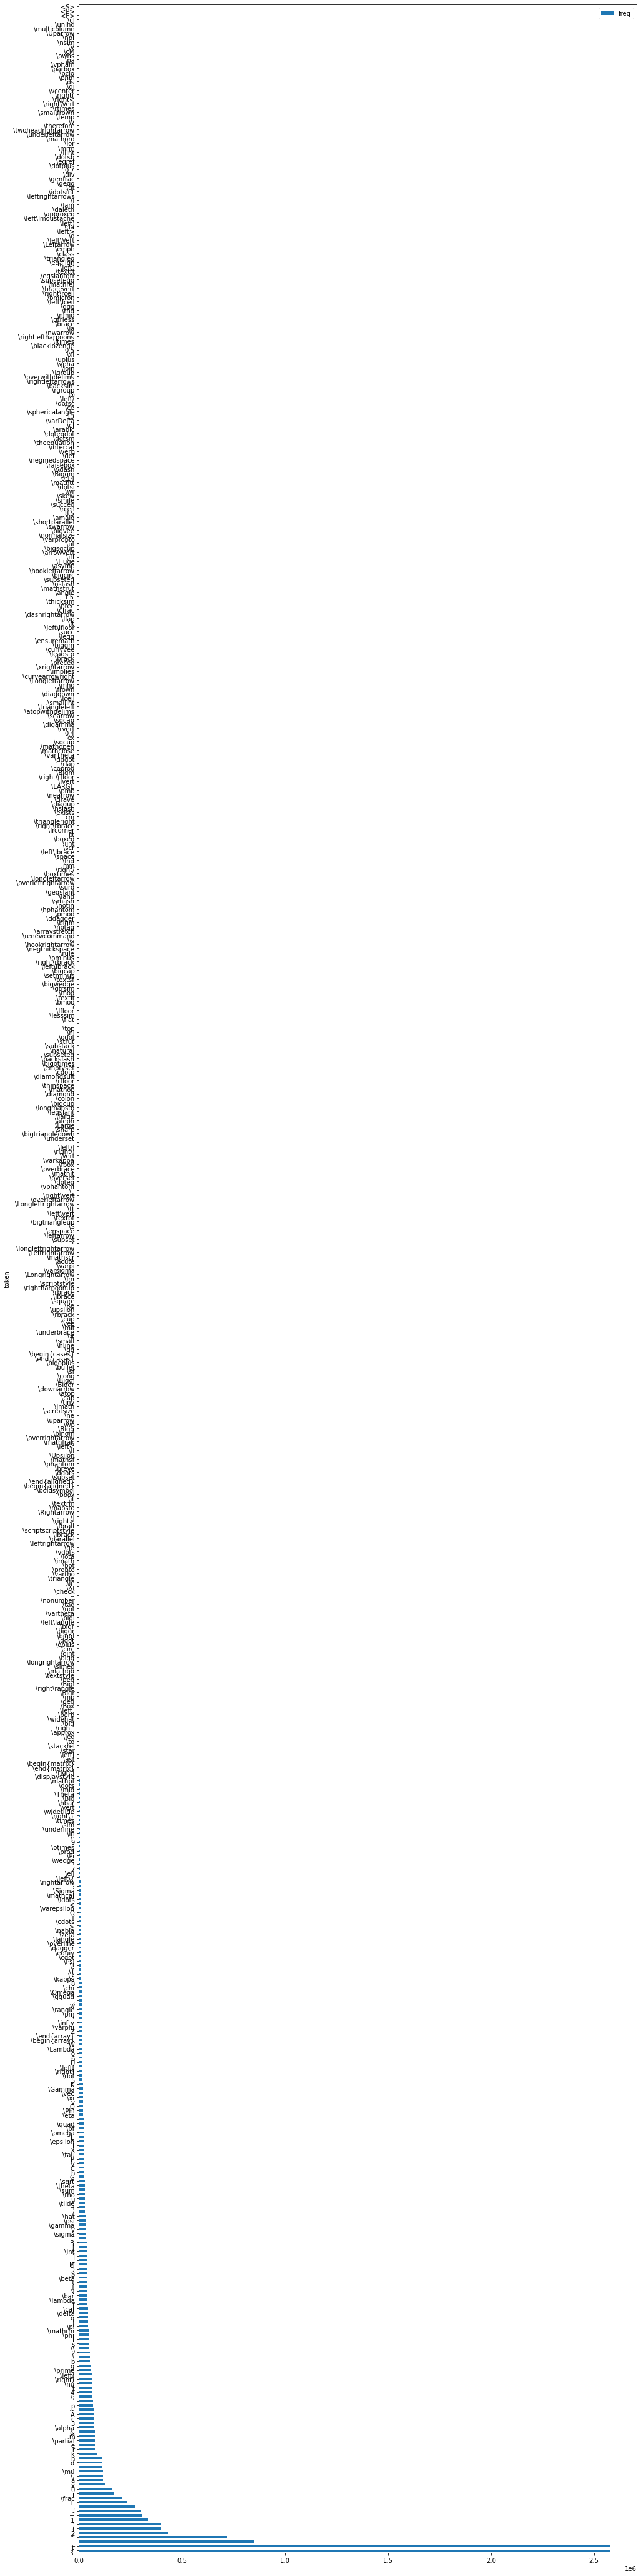

In [12]:
# Plot of vocabulary
import matplotlib.pyplot as plt

# first order the columns by decsending frequncy 
data.data_server.vocabulary_dataframe = data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

# next we plot them
data.data_server.vocabulary_dataframe.plot(x="token", y='freq', kind='barh', figsize =(16,75))
plt.show()

#### Look at the distribution of data

In [13]:
# We plot the tokenized len distribution

tokenized_len = data.df['tokenized_len'].value_counts()
tokenized_len

37    3896
35    3884
36    3858
39    3846
41    3806
      ... 
10      97
9       70
8       32
7       31
6        5
Name: tokenized_len, Length: 122, dtype: int64

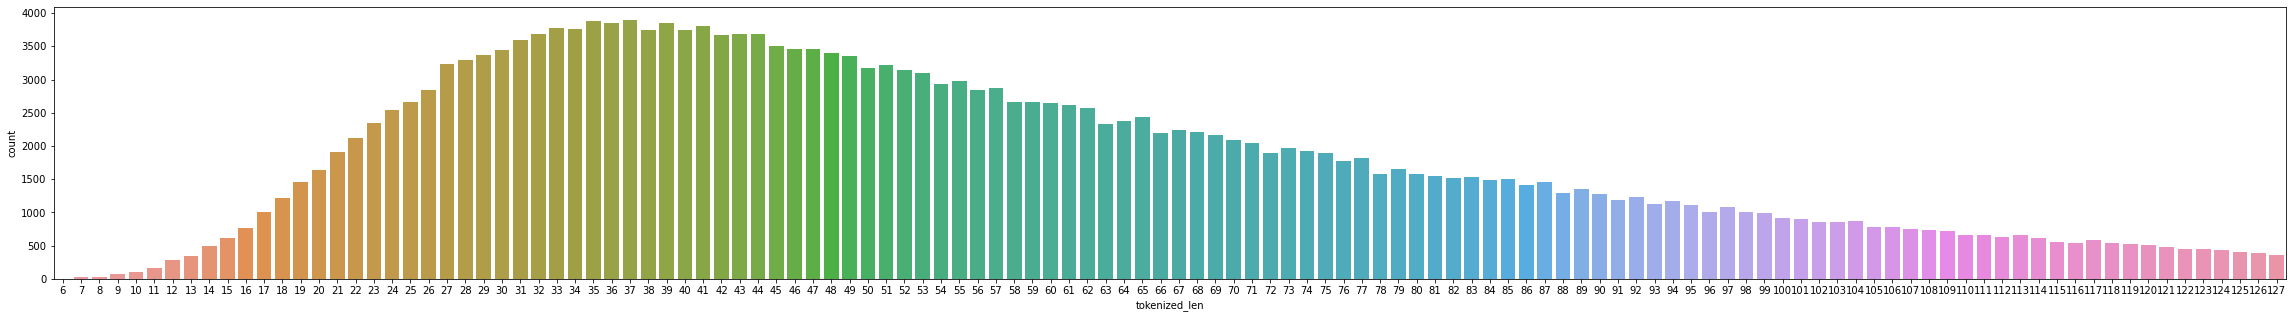

In [14]:
# How long are formulas
plt.figure(figsize=(40,5))
sns.countplot(x=data.df['tokenized_len']);

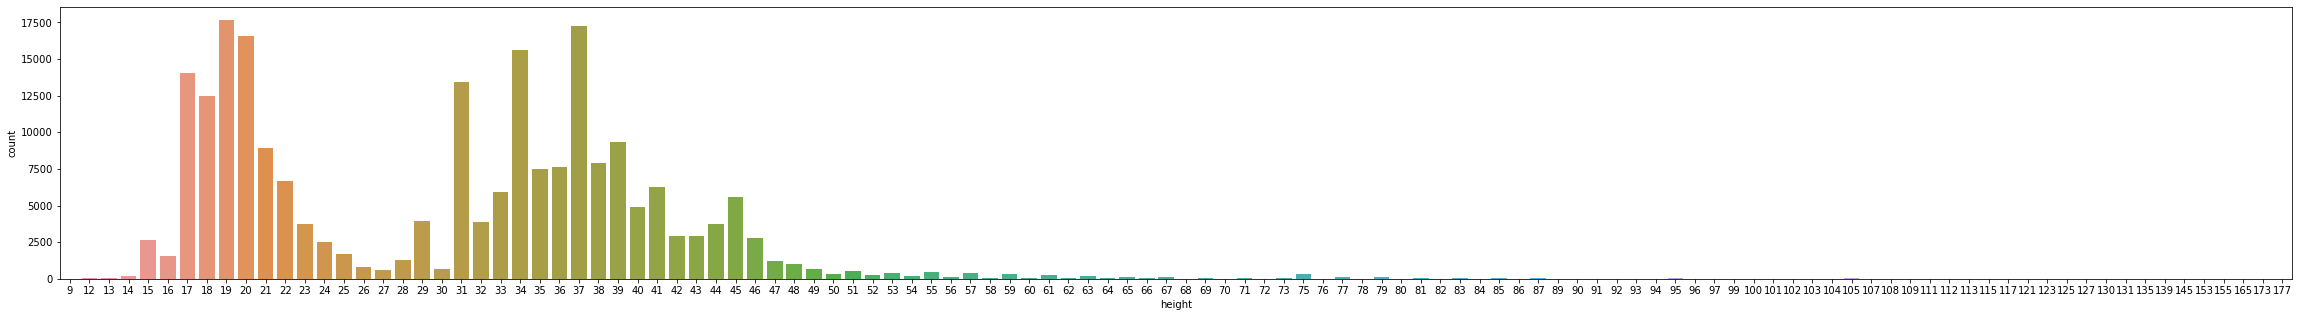

In [15]:
# Images heights PLOT
plt.figure(figsize=(40,5))
sns.countplot(x = data.df['height'])
plt.show()

In [16]:
data.df['height'].mean()

30.36885727190605

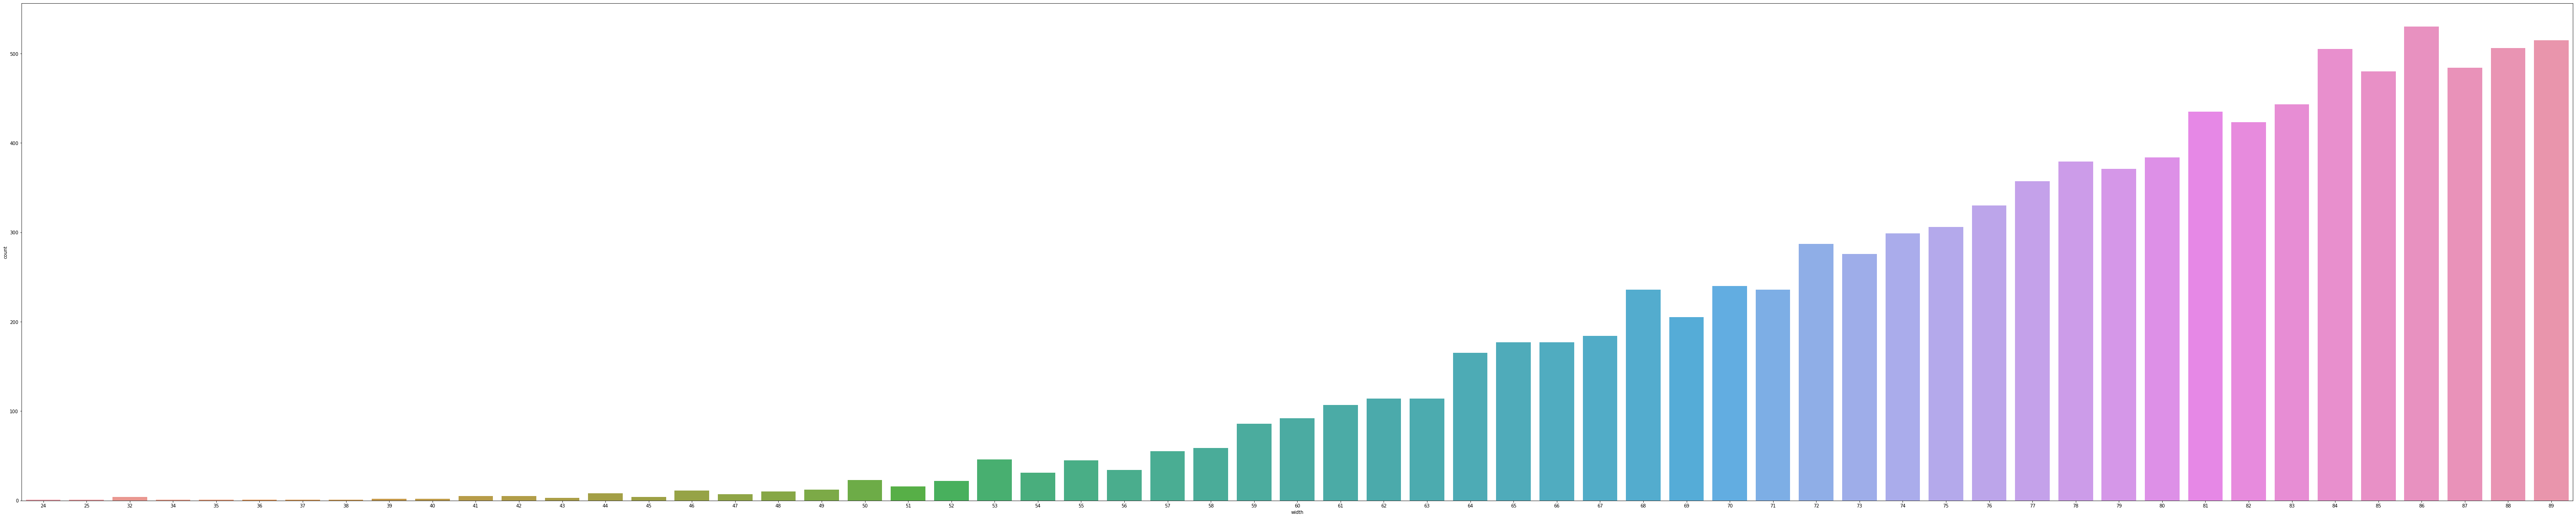

In [17]:
# Images wodth PLOT
plt.figure(figsize=(100,20))
sns.countplot(x = data.df['width'][(data.df['width']<90) & (data.df['width']<1000) ])
plt.show()


In [18]:
data.df['width'].mean()

216.8991327913279

## Acessing the data

In [19]:
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = data.vocabulary
    inverse_mapping =data.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s + str(letter)
    return s


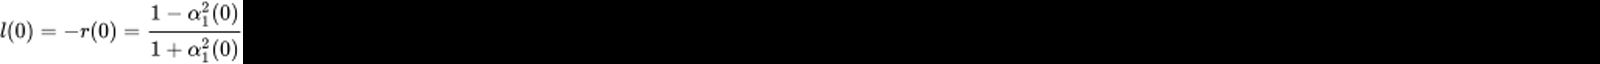

<S>\langle\phi_{i}(z_{1},\bar{z}_{1})\phi_{j}(z_{2},\bar{z}_{2})\rangle_{B};\qquad\langle\Psi_{r}(z_{1},\bar{z}_{1})\Psi_{\sigma}(z_{2},\bar{z}_{2})\rangle_{B}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>


In [20]:
transform = transforms.ToPILImage()
display(transform(data.data_train[10000][0]))
print(token_to_strings(data.data_train[1][1]))

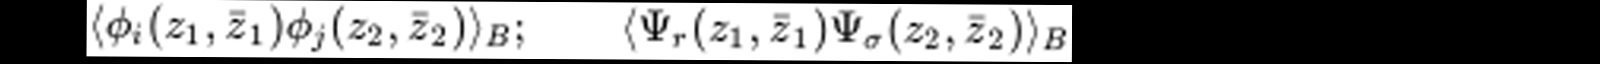

In [21]:
display(transform(data.data_train[1][0]))

torch.Size([1, 64, 1600])

Original image and formula:


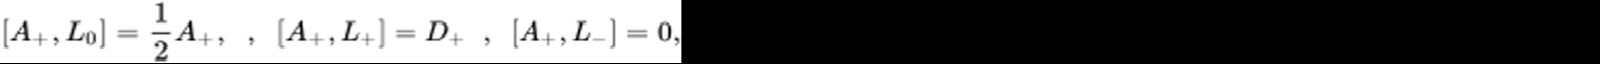

<S>[A_{+},L_{0}]=\frac{1}{2}A_{+},\;\;,\;\[A_{+},L_{+}]=D_{+}\;\;,\;\[A_{+},L_{-}]=0,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


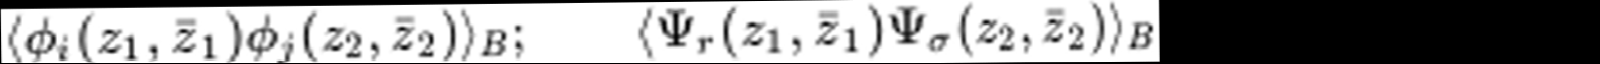

<S>\langle\phi_{i}(z_{1},\bar{z}_{1})\phi_{j}(z_{2},\bar{z}_{2})\rangle_{B};\qquad\langle\Psi_{r}(z_{1},\bar{z}_{1})\Psi_{\sigma}(z_{2},\bar{z}_{2})\rangle_{B}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


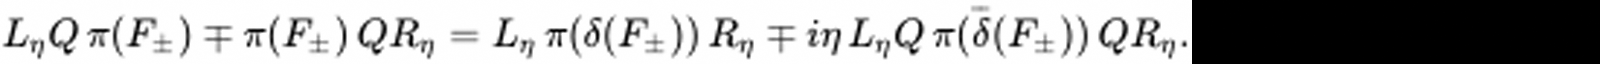

<S>L_{\eta}Q\,\pi(F_{\pm})\mp\pi(F_{\pm})\,QR_{\eta}=L_{\eta}\,\pi(\delta(F_{\pm}))\,R_{\eta}\mpi\eta\,L_{\eta}Q\,\pi(\overline{{\delta}}(F_{\pm}))\,QR_{\eta}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


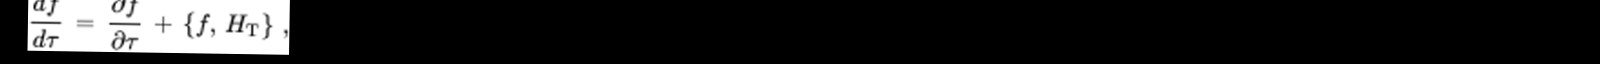

<S>\frac{df}{d\tau}\,=\,\frac{\partialf}{\partial\tau}\,+\,\left\{f,\,H_{\mathrm{T}}\right\}\,{,}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


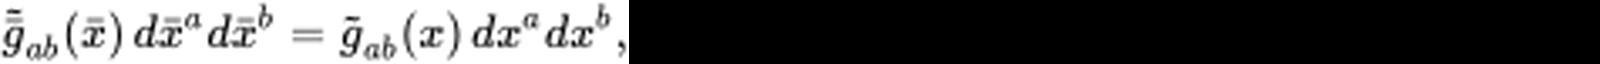

<S>\tilde{\bar{g}}_{ab}(\bar{x})\,d\bar{x}^{a}d\bar{x}^{b}=\tilde{g}_{ab}(x)\,dx^{a}dx^{b},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


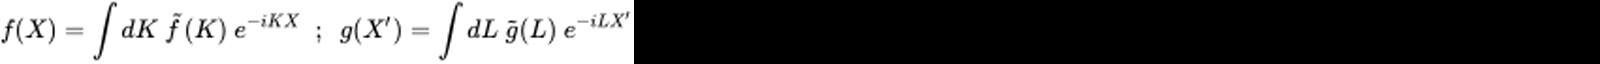

<S>f(X)=\intdK~\tilde{f}(K)~e^{-iKX}~~;~~g(X^{\prime})=\intdL~\tilde{g}(L)~e^{-iLX^{\prime}}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


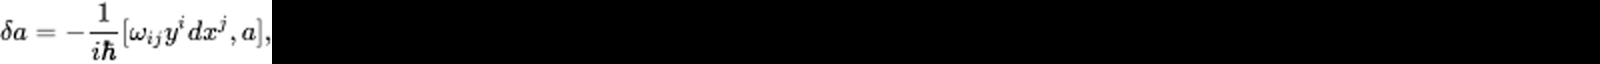

<S>\deltaa=-\frac1{i\hbar}[\omega_{ij}y^{i}dx^{j},a],<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


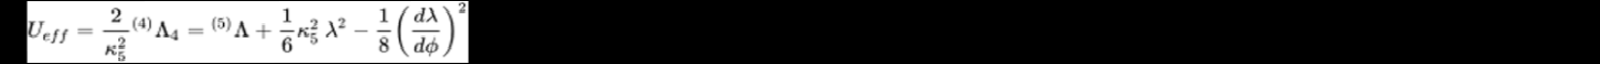

<S>U_{eff}={\frac{2}{\kappa_{5}^{2}}}{}^{(4)}\Lambda_{4}={}^{(5)}\Lambda+\frac{1}{6}\kappa_{5}^{2}\,\lambda^{2}-{\frac{1}{8}}\left({\frac{d\lambda}{d\phi}}\right)^{2}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


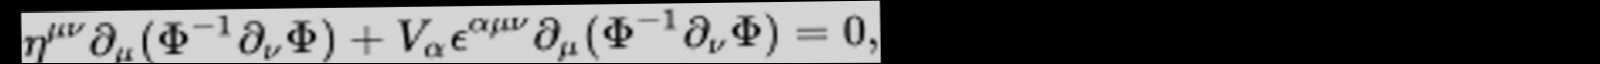

<S>\eta^{\mu\nu}\partial_{\mu}(\Phi^{-1}\partial_{\nu}\Phi)+V_{\alpha}\epsilon^{\alpha\mu\nu}\partial_{\mu}(\Phi^{-1}\partial_{\nu}\Phi)=0,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


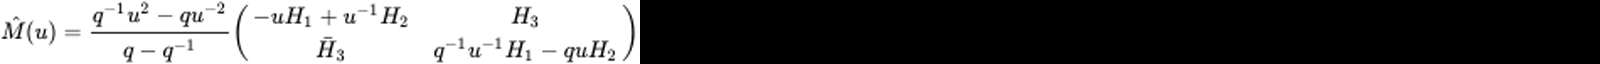

<S>\hat{M}(u)=\frac{q^{-1}u^{2}-qu^{-2}}{q-q^{-1}}\left(\begin{array}{cc}{-uH_{1}+u^{-1}H_{2}}&{H_{3}}\\{\bar{H}_{3}}&{q^{-1}u^{-1}H_{1}-quH_{2}}\\\end{array}\right)<E><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


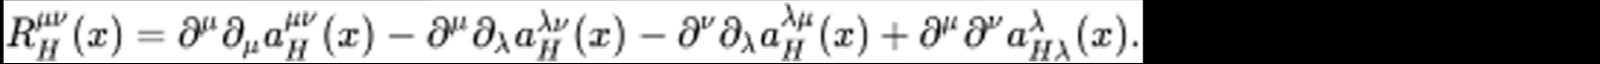

<S>R_{H}^{\mu\nu}(x)=\partial^{\mu}\partial_{\mu}a_{H}^{\mu\nu}(x)-\partial^{\mu}\partial_{\lambda}a_{H}^{\lambda\nu}(x)-\partial^{\nu}\partial_{\lambda}a_{H}^{\lambda\mu}(x)+\partial^{\mu}\partial^{\nu}a_{H\lambda}^{\lambda}(x).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


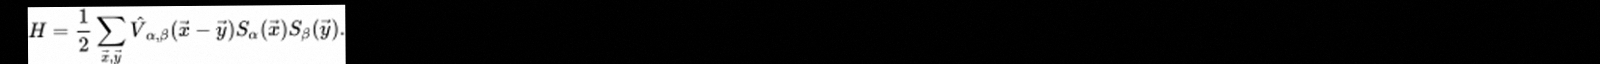

<S>H=\frac{1}{2}\sum_{\vec{x},\vec{y}}\hat{V}_{\alpha,\beta}(\vec{x}-\vec{y})S_{\alpha}(\vec{x})S_{\beta}(\vec{y}).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


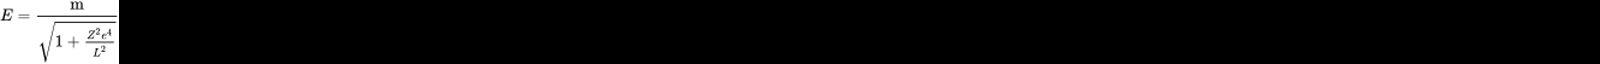

<S>E=\frac{\mathrm{m}}{\sqrt{1+\frac{Z^{2}e^{4}}{L^{2}}}}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


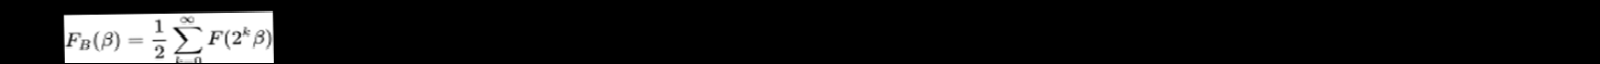

<S>F_{B}(\beta)=\frac{1}{2}\sum_{k=0}^{\infty}F(2^{k}\beta)<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


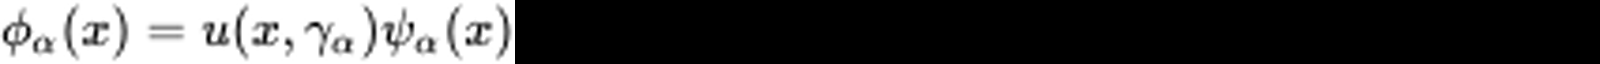

<S>\phi_{\alpha}(x)=u(x,\gamma_{\alpha})\psi_{\alpha}(x)<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


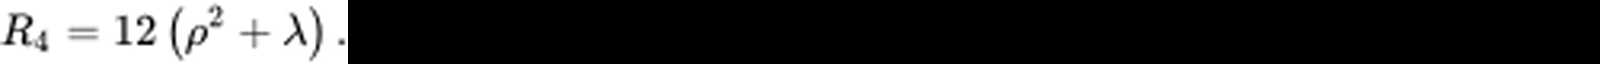

<S>R_{4}=12\left(\rho^{2}+\lambda\right).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


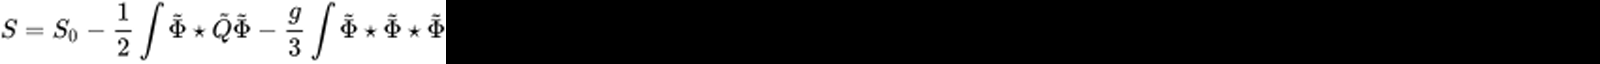

<S>S=S_{0}-\frac{1}{2}\int\tilde{\Phi}\star\tilde{Q}\tilde{\Phi}-\frac{g}{3}\int\tilde{\Phi}\star\tilde{\Phi}\star\tilde{\Phi}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


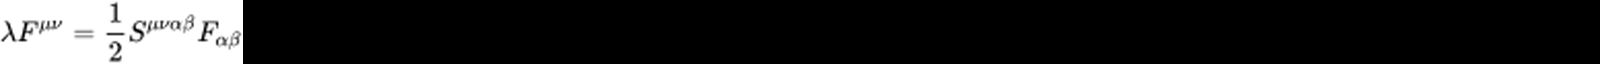

<S>\lambdaF^{\mu\nu}=\frac{1}{2}S^{\mu\nu\alpha\beta}F_{\alpha\beta}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


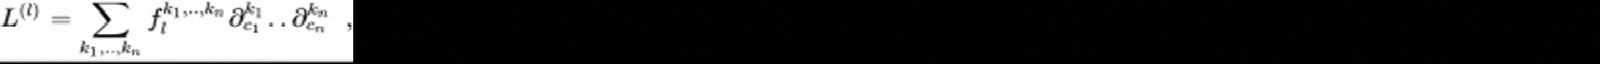

<S>L^{(l)}=\sum_{k_{1},..,k_{n}}f_{l}^{k_{1},..,k_{n}}\partial_{c_{1}}^{k_{1}}..\partial_{c_{n}}^{k_{n}}~~,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


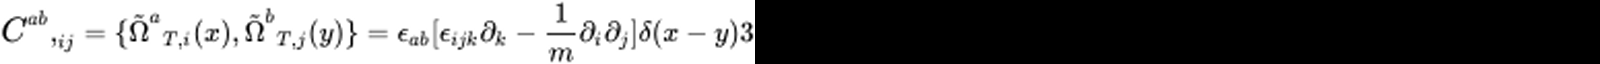

<S>{{\largeC}^{ab},}_{ij}=\{{\tilde{\Omega}^{a}}_{T,i}(x),{\tilde{\Omega}^{b}}_{T,j}(y)\}=\epsilon_{ab}[\epsilon_{ijk}\partial_{k}-{\frac{1}{m}}\partial_{i}\partial_{j}]\delta(x-y)3<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


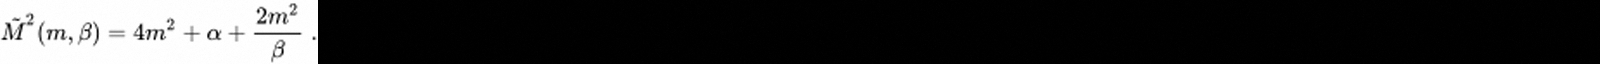

<S>\tilde{M}^{2}(m,\beta)=4m^{2}+\alpha+\frac{2m^{2}}{\beta}\;.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


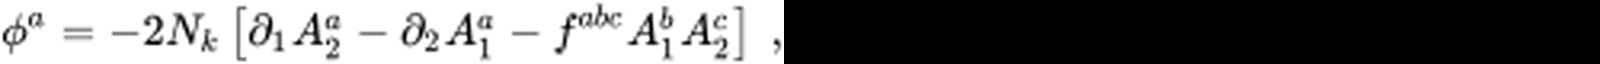

<S>\phi^{a}=-2N_{k}\left[\partial_{1}A_{2}^{a}-\partial_{2}A_{1}^{a}-f^{abc}A_{1}^{b}A_{2}^{c}\right]\,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


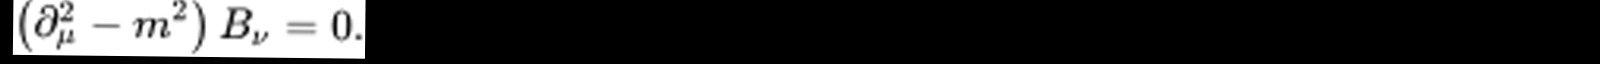

<S>\left(\partial_{\mu}^{2}-m^{2}\right)B_{\nu}=0.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


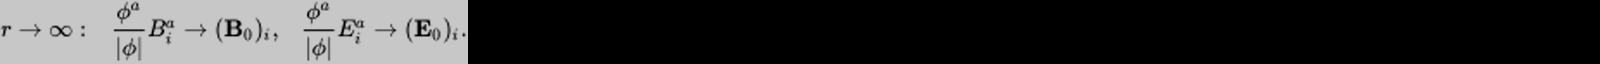

<S>r\rightarrow\infty:\\\{\frac{\phi^{a}}{|\phi|}}B_{i}^{a}\rightarrow({\bfB}_{0})_{i},\\\{\frac{\phi^{a}}{|\phi|}}E_{i}^{a}\rightarrow({\bfE}_{0})_{i}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


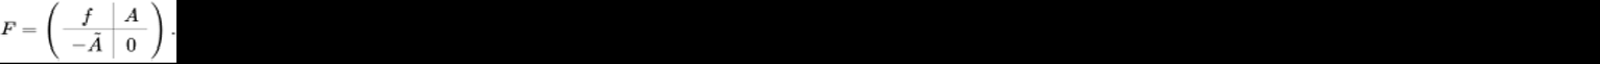

<S>F=\left(\begin{array}{c|c}{f}&{A}\\\hline{-\tilde{A}}&{0}\\\end{array}\right).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


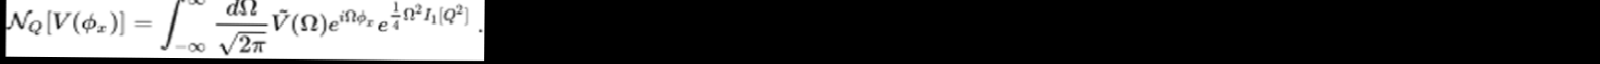

<S>{\calN}_{Q}[V(\phi_{x})]=\int_{-\infty}^{\infty}{\frac{d\Omega}{\sqrt{2\pi}}}{\tilde{V}}(\Omega)e^{i\Omega\phi_{x}}e^{{\frac{1}{4}}\Omega^{2}I_{1}[Q^{2}]}\;.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


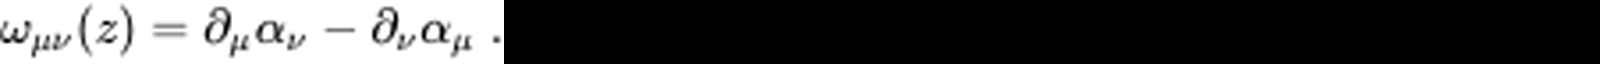

<S>\omega_{\mu\nu}(z)=\partial_{\mu}\alpha_{\nu}-\partial_{\nu}\alpha_{\mu}~.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


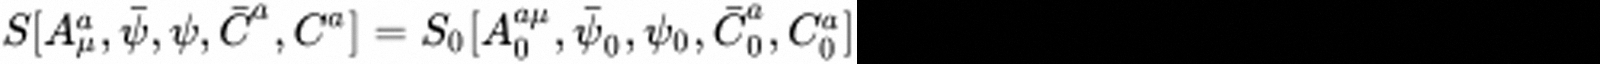

<S>S[A_{\mu}^{a},\bar{\psi},\psi,\bar{C}^{a},C^{a}]=S_{0}[A_{0}^{a\mu},\bar{\psi}_{0},\psi_{0},\bar{C}_{0}^{a},C_{0}^{a}]<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


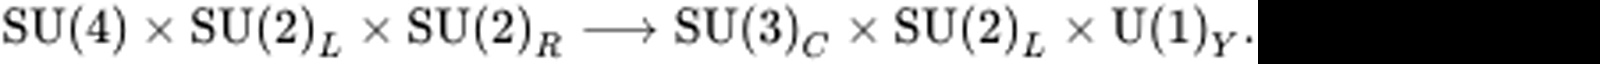

<S>\mathrm{SU(4)}\times\mathrm{SU(2)}_{L}\times\mathrm{SU(2)}_{R}\longrightarrow\mathrm{SU(3)}_{C}\times\mathrm{SU(2)}_{L}\times\mathrm{U(1)}_{Y}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


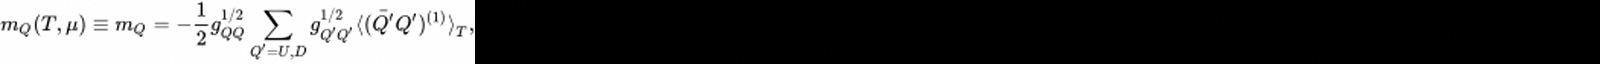

<S>m_{Q}(T,\mu)\equivm_{Q}=-\frac{1}{2}g_{QQ}^{1/2}\sum_{Q^{\prime}=U,D}g_{Q^{\prime}Q^{\prime}}^{1/2}{\langle(\bar{Q^{\prime}}Q^{\prime})^{(1)}\rangle}_{T},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


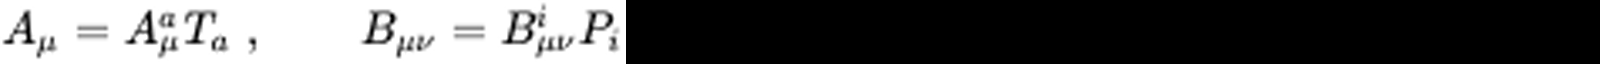

<S>A_{\mu}=A_{\mu}^{a}T_{a}\;,\qquadB_{\mu\nu}=B_{\mu\nu}^{i}P_{i}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


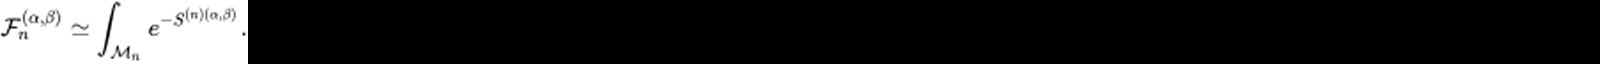

<S>{\calF}_{n}^{(\alpha,\beta)}\simeq\int_{{\calM}_{n}}e^{-S^{(n)(\alpha,\beta)}}.\nonumber<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


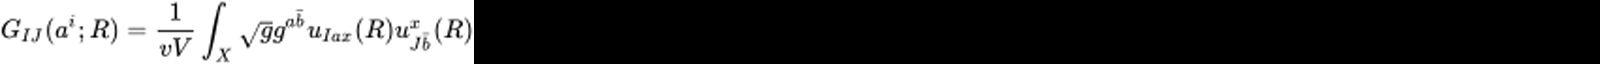

<S>G_{IJ}(a^{i};R)={\frac{1}{vV}}\int_{X}\sqrt{g}g^{a\bar{b}}u_{Iax}(R)u_{J\bar{b}}^{x}(R)<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


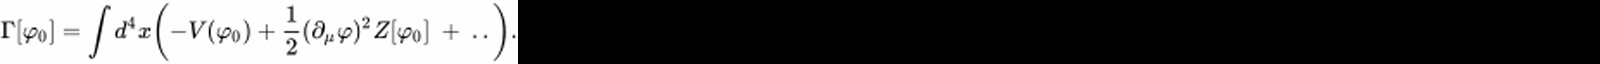

<S>\Gamma[\varphi_{0}]=\intd^{4}x\biggl(-V(\varphi_{0})+\frac{1}{2}(\partial_{\mu}\varphi)^{2}Z[\varphi_{0}]~+~..\biggr).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


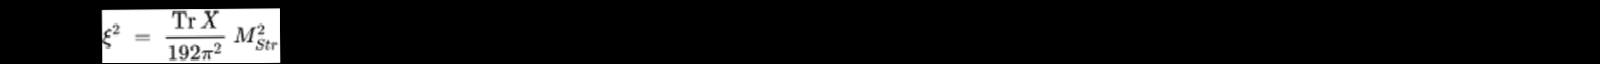

<S>\xi^{2}\=\\frac{\mathrm{Tr}\,X}{192\pi^{2}}\M_{Str}^{2}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


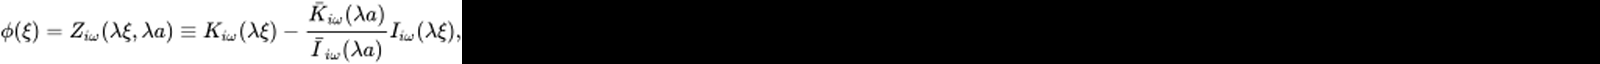

<S>\phi(\xi)=Z_{i\omega}(\lambda\xi,\lambdaa)\equivK_{i\omega}(\lambda\xi)-\frac{\bar{K}_{i\omega}(\lambdaa)}{\bar{I}_{i\omega}(\lambdaa)}I_{i\omega}(\lambda\xi),<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


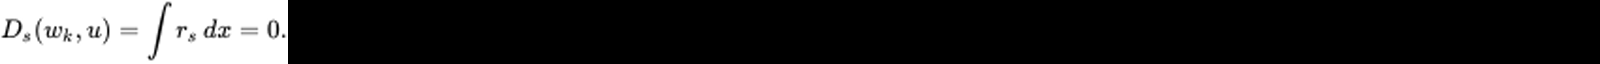

<S>D_{s}(w_{k},u)=\intr_{s}\,dx=0.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


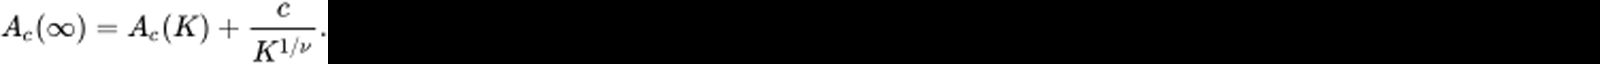

<S>A_{c}(\infty)=A_{c}(K)+\frac{c}{K^{1/\nu}}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


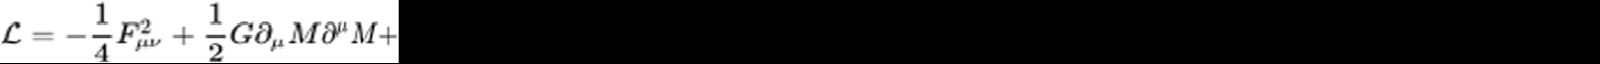

<S>{\calL}=-\frac14F_{\mu\nu}^{2}+\frac12G\partial_{\mu}M\partial^{\mu}M+<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


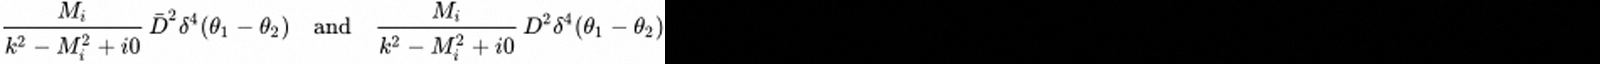

<S>\frac{M_{i}}{k^{2}-M_{i}^{2}+i0}\,\bar{D}^{2}\delta^{4}(\theta_{1}-\theta_{2})\quad\mathrm{and}\quad\frac{M_{i}}{k^{2}-M_{i}^{2}+i0}\,D^{2}\delta^{4}(\theta_{1}-\theta_{2})<E><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


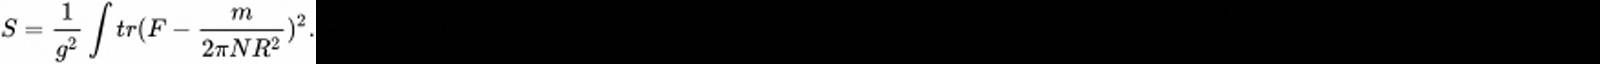

<S>S=\frac{1}{g^{2}}\inttr(F-\frac{m}{2\piNR^{2}})^{2}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


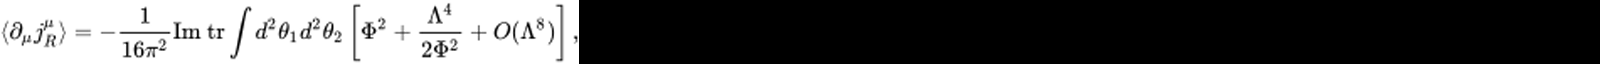

<S>\langle\partial_{\mu}j_{R}^{\mu}\rangle=-\frac{1}{16\pi^{2}}\mathrm{Im}\\mathrm{tr}\intd^{2}\theta_{1}d^{2}\theta_{2}\left[\Phi^{2}+\frac{\Lambda^{4}}{2\Phi^{2}}+O(\Lambda^{8})\right],<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


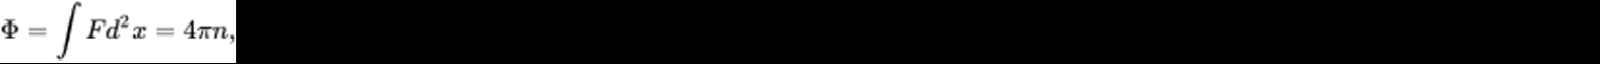

<S>\Phi=\intFd^{2}x=4\pin,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


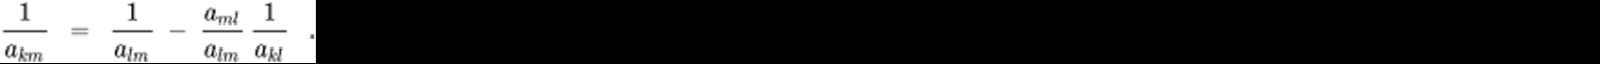

<S>{\frac{1}{a_{km}}}~~=~~{\frac{1}{a_{lm}}}~-~{\frac{a_{ml}}{a_{lm}}}\,{\frac{1}{a_{kl}}}~~~.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


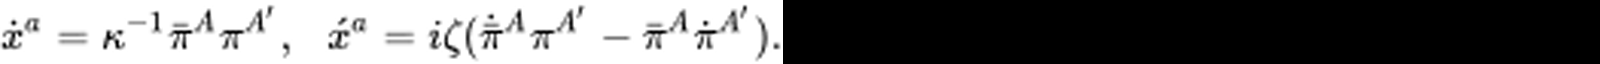

<S>\dot{x}{}^{a}=\kappa^{-1}\bar{\pi}{}^{A}\pi^{A^{\prime}},\,\,\,\,\acute{x}{}^{a}=i\zeta(\dot{\bar{\pi}}{}^{A}\pi^{A^{\prime}}-\bar{\pi}{}^{A}\dot{\pi}{}^{A^{\prime}}).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


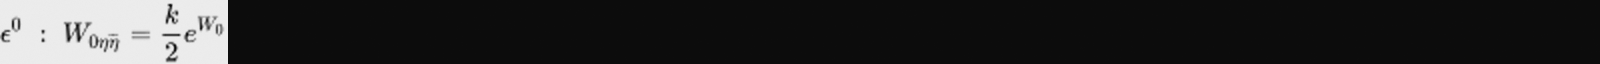

<S>\epsilon^{0}\;:\;W_{0\eta\overline{{\eta}}}={\frac{k}{2}}e^{W_{0}}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


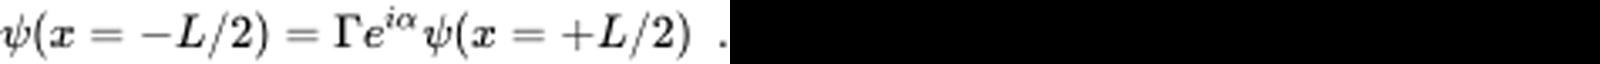

<S>\psi(x=-L/2)=\Gammae^{i\alpha}\psi(x=+L/2)\\.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


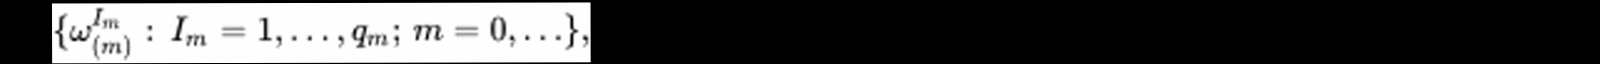

<S>\{\omega_{(m)}^{I_{m}}:\,I_{m}=1,\ldots,q_{m};\,m=0,\ldots\},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


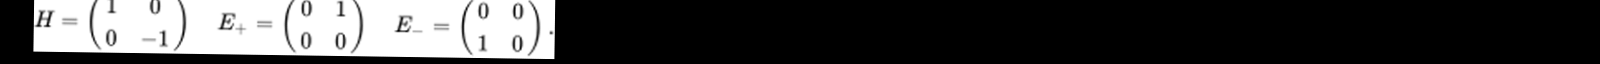

<S>H=\left(\begin{array}{cc}{1}&{0}\\{0}&{-1}\\\end{array}\right)\quadE_{+}=\left(\begin{array}{cc}{0}&{1}\\{0}&{0}\\\end{array}\right)\quadE_{-}=\left(\begin{array}{cc}{0}&{0}\\{1}&{0}\\\end{array}\right).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


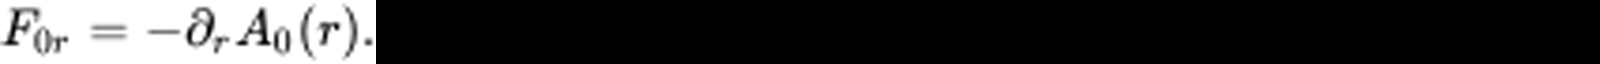

<S>F_{0r}=-\partial_{r}A_{0}(r).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


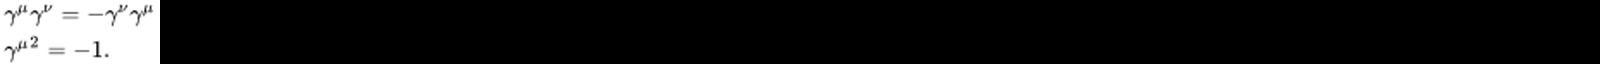

<S>\begin{array}{lcr}{{\gamma^{\mu}}{\gamma^{\nu}}=-{\gamma^{\nu}}{\gamma^{\mu}}}\\{{\gamma^{\mu}}^{2}=-1.}\\\end{array}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


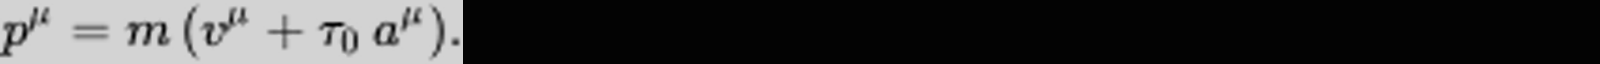

<S>p^{\mu}=m\,(v^{\mu}+\tau_{0}\,a^{\mu}).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


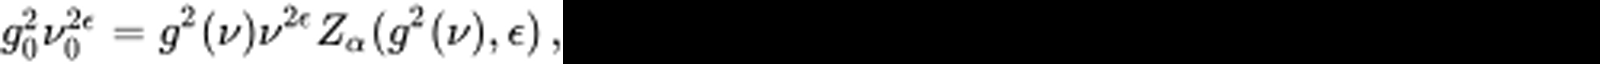

<S>g_{0}^{2}\nu_{0}^{2\epsilon}=g^{2}(\nu)\nu^{2\epsilon}Z_{\alpha}(g^{2}(\nu),\epsilon)\,,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


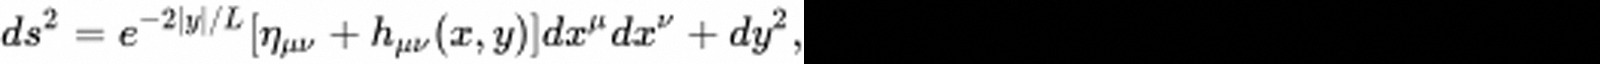

<S>ds^{2}=e^{-2|y|/L}[\eta_{\mu\nu}+h_{\mu\nu}(x,y)]dx^{\mu}dx^{\nu}+dy^{2},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


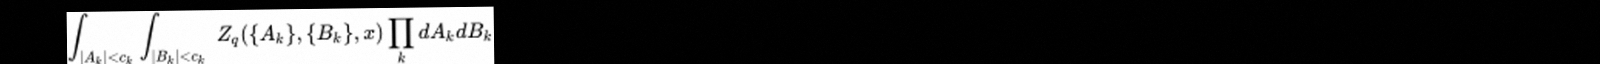

<S>\int_{|A_{k}|<c_{k}}\int_{|B_{k}|<c_{k}}\Z_{q}(\{A_{k}\},\{B_{k}\},x)\prod_{k}dA_{k}dB_{k}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


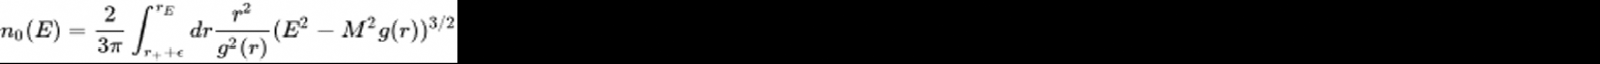

<S>n_{0}(E)={\frac{2}{3\pi}}\int_{r_{+}+\epsilon}^{r_{E}}dr{\frac{r^{2}}{g^{2}(r)}}(E^{2}-M^{2}g(r))^{3/2}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


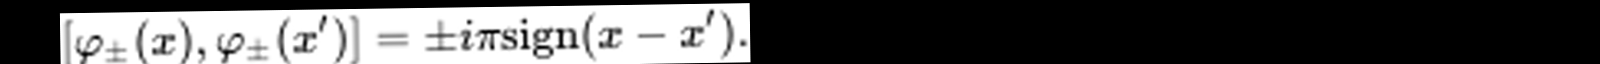

<S>[\varphi_{\pm}(x),\varphi_{\pm}(x^{\prime})]=\pmi\pi\mathrm{sign}(x-x^{\prime}).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


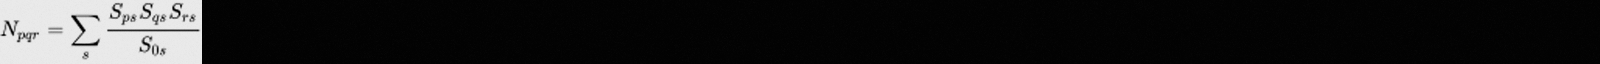

<S>N_{pqr}=\sum_{s}\frac{S_{ps}S_{qs}S_{rs}}{S_{0s}}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


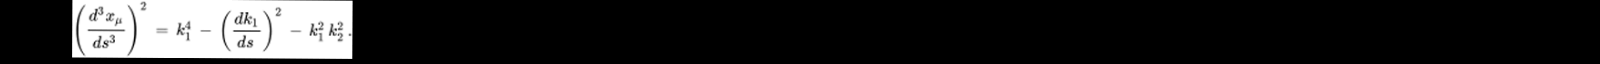

<S>\left(\frac{d^{3}x_{\mu}}{ds^{3}\,}\right)^{2}\,=\,k_{1}^{4}\,-\,\left(\frac{dk_{1}}{ds\,}\right)^{2}\,-\,k_{1}^{2}\,k_{2}^{2}\,{.}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


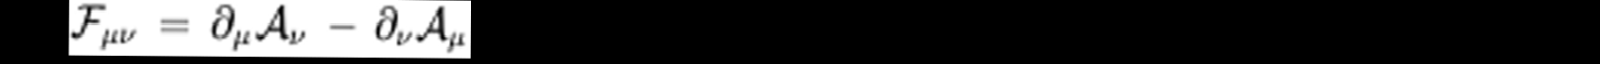

<S>\mathcal{F}_{\mu\nu}\,=\,\partial_{\mu}\mathcal{A}_{\nu}\,-\,\partial_{\nu}\mathcal{A}_{\mu}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


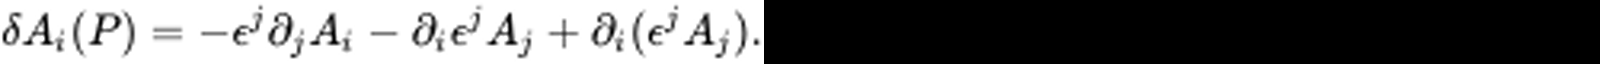

<S>\deltaA_{i}(P)=-\epsilon^{j}\partial_{j}A_{i}-\partial_{i}\epsilon^{j}A_{j}+\partial_{i}(\epsilon^{j}A_{j}).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


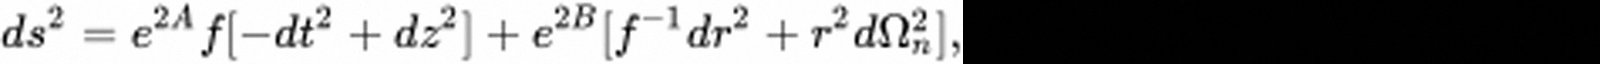

<S>ds^{2}=e^{2A}f[-dt^{2}+dz^{2}]+e^{2B}[f^{-1}dr^{2}+r^{2}d\Omega_{n}^{2}],<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


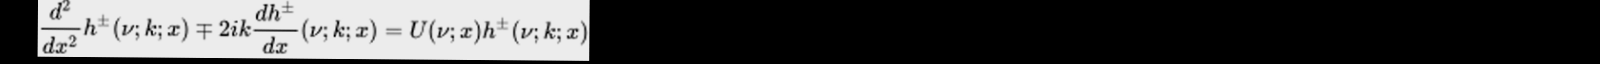

<S>\frac{d^{2}}{dx^{2}}h^{\pm}(\nu;k;x)\mp2ik\frac{dh^{\pm}}{dx}(\nu;k;x)=U(\nu;x)h^{\pm}(\nu;k;x)<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


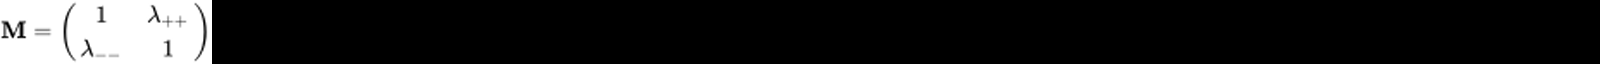

<S>{\bfM}=\left(\begin{array}{cc}{1}&{{\lambda_{++}}}\\{{\lambda_{--}}}&{1}\\\end{array}\right)<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


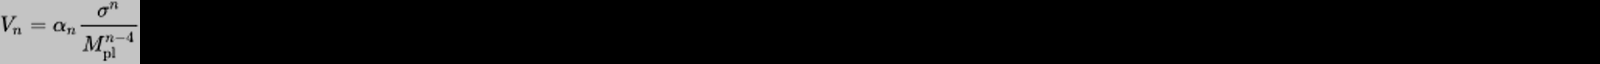

<S>V_{n}=\alpha_{n}\frac{\sigma^{n}}{M_{\mathrm{pl}}^{n-4}}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


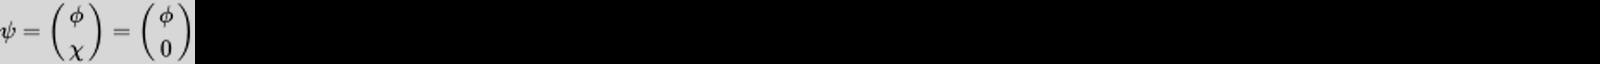

<S>\psi=\left(\begin{array}{c}{\phi}\\{\chi}\\\end{array}\right)=\left(\begin{array}{c}{\phi}\\{0}\\\end{array}\right)<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


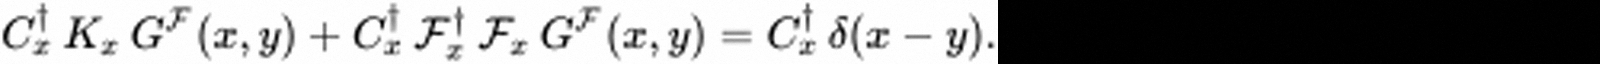

<S>C_{x}^{\dagger}\,K_{x}\,G^{\calF}(x,y)+C_{x}^{\dagger}\,{\calF}_{x}^{\dagger}\,{\calF}_{x}\,G^{\calF}(x,y)=C_{x}^{\dagger}\,\delta(x-y).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


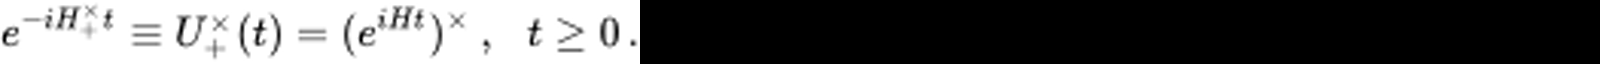

<S>e^{-iH_{+}^{\times}t}\equivU_{+}^{\times}(t)=(e^{iHt})^{\times}\,,\,\,\,\,t\geq0\,.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


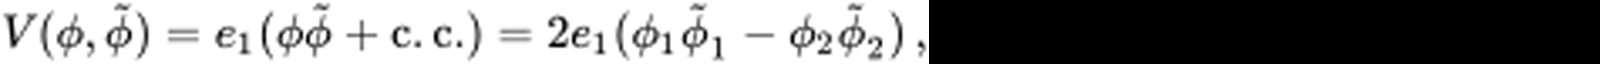

<S>V(\phi,\tilde{\phi})=e_{1}(\phi\tilde{\phi}+\mathrm{c.c.})=2e_{1}(\phi_{1}\tilde{\phi}_{1}-\phi_{2}\tilde{\phi}_{2})\,,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 64, 1600])

Original image and formula:


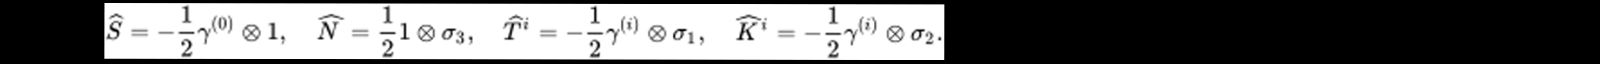

<S>\widehat{S}=-\frac{1}{2}\gamma^{(0)}\otimes1,\quad\widehat{N}=\frac{1}{2}1\otimes\sigma_{3},\quad\widehat{T}{}^{i}=-\frac{1}{2}\gamma^{(i)}\otimes\sigma_{1},\quad\widehat{K}{}^{i}=-\frac{1}{2}\gamma^{(i)}\otimes\sigma_{2}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 



In [22]:
for i in range(70):
    # Get image and label from train data -- change number for different ones
    image_tensor, label = data.data_train[i]
    print(image_tensor.shape)
    transform = transforms.ToPILImage()
    image = transform(image_tensor)
    

    print('\nOriginal image and formula:')
    display(image)
    print(token_to_strings(label))
    print('\nPredicted formula: \n')

In [23]:
data.df.loc[0]

formula            R _ { 1 2 } K _ { 1 } R _ { 2 1 } d K _ { 2 } ...
image_name                                       80f1db54ec657ab.png
height                                                            20
width                                                            200
formula_length                                                   105
latex_tokenized    [R, _, {, 1, 2, }, K, _, {, 1, }, R, _, {, 2, ...
tokenized_len                                                     53
Name: 0, dtype: object

Image is below


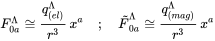

Label:


<IPython.core.display.Math object>

Tex formula: 

F _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( e l ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a } \quad ; \quad { \tilde { F } } _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( m a g ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a }


In [24]:
#How to access generated png images 
IMAGE_NAME = data.df['image_name'][10]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

In [25]:
import tqdm
import cv2
import heapq

# Initialize parameters
min_h = 1e10
min_w = 1e10
max_h = -1
max_w = -1
min_ratio = 1e10
max_ratio = 0
# Traverse the dataset to collect size info
for i in tqdm.tqdm(range(len(data.df['image_name']))):
    try:
        image_name = data.df['image_name'][i]
    except:
        continue
    image_path= "Data/Data_Bank/generated_png_images/" + image_name
    img = cv2.imread(image_path)  # Read image
    h,w, c = img.shape
     # Extract size
    ratio = w / h  # Calculate ratio
    min_h = min_h if min_h <= h else h  # Minimum height
    max_h = max_h if max_h >= h else h  # Maximum height
    min_w = min_w if min_w <= w else w  # Minimum height
    max_w = max_w if max_w >= w else w  # Maximum height
    min_ratio = min_ratio if min_ratio <= ratio else ratio  # Minimum ratio
    max_ratio = max_ratio if max_ratio >= ratio else ratio  # Maximum ratio
# Print info
print('min_h:', min_h)
print('max_h:', max_h)
print('min_w:', min_w)
print('max_w:', max_w)
print('min_ratio:', min_ratio)
print('max_ratio:', max_ratio)

100%|████████████████████████████████████████████████████████████████| 221400/221400 [00:34<00:00, 6466.81it/s]

min_h: 9
max_h: 177
min_w: 24
max_w: 512
min_ratio: 0.42857142857142855
max_ratio: 35.357142857142854
